<a href="https://colab.research.google.com/github/ronupanchal/ML_Algorithm_code/blob/main/ML_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#!pip install matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy import stats

In [4]:
x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

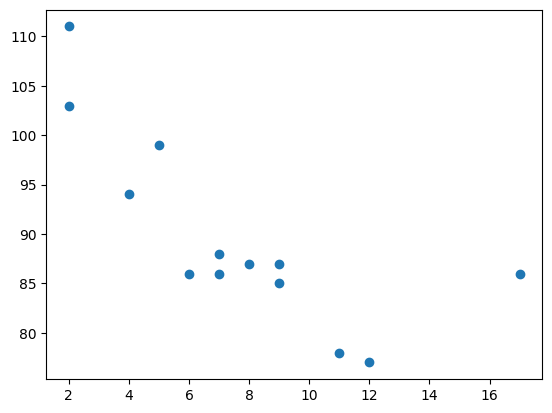

In [5]:
plt.scatter(x, y)
plt.show()

In [6]:
slope, intercept, r, p, std_err = stats.linregress(x, y)

In [7]:
print("slope:",slope)
print("intercept:",intercept)
print("r:",r)
print("p:",p)
print("std_err:",std_err)


slope: -1.7512877115526118
intercept: 103.10596026490066
r: -0.758591524376155
p: 0.0026468739224561064
std_err: 0.453536157607742


In [8]:
def myfunc(x):
  return slope * x + intercept

In [9]:
mymodel = list(map(myfunc, x))

In [10]:
mymodel   

[94.3495217071376,
 90.84694628403238,
 89.09565857247976,
 90.84694628403238,
 99.60338484179543,
 73.33406916850626,
 99.60338484179543,
 87.34437086092716,
 96.10080941869022,
 83.84179543782193,
 82.09050772626932,
 87.34437086092716,
 92.59823399558499]

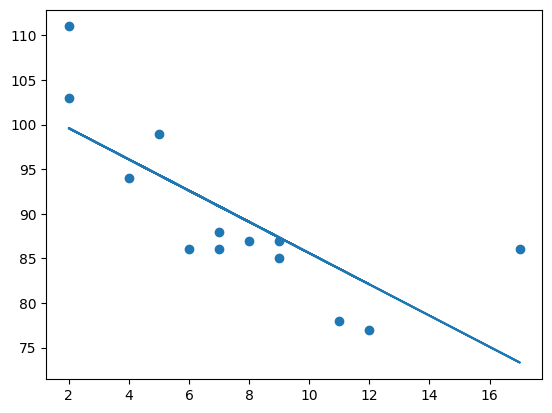

In [11]:
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [12]:
speed = myfunc(10)
speed

85.59308314937454

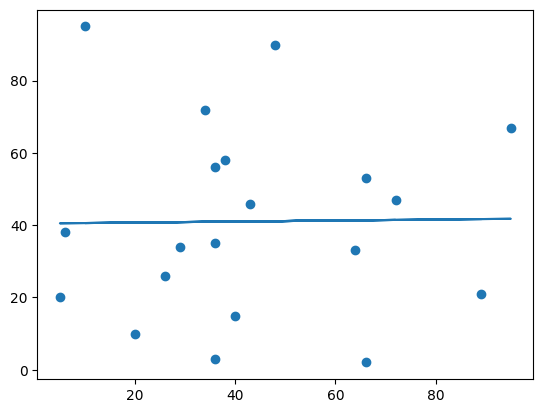

In [13]:
x1 =[89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y1 = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

slope, intercept, r, p, std_err = stats.linregress(x1, y1)

def myfunc(x1):
  return slope * x1 + intercept

mymodel = list(map(myfunc, x1))

plt.scatter(x1, y1)
plt.plot(x1, mymodel)
plt.show()

In [14]:
print("r:",r) # bad fit, no relation btwn 

r: 0.01331814154297491


In [17]:
df = pd.read_csv("/content/sample_data/home_prices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [18]:
df.columns

Index(['area', 'price'], dtype='object')

In [19]:
df.shape

(5, 2)

In [20]:
df.tail(2)

,area,price
3,3600,680000
4,4000,725000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    5 non-null      int64
 1   price   5 non-null      int64
dtypes: int64(2)
memory usage: 208.0 bytes


In [22]:
df.describe()

,area,price
count,5.000000,5.000000
mean,3280.000000,626000.000000
std,540.370243,74949.983322
min,2600.000000,550000.000000
25%,3000.000000,565000.000000
50%,3200.000000,610000.000000
75%,3600.000000,680000.000000
max,4000.000000,725000.000000


In [23]:
df.corr()

,area,price
area,1.000000,0.978994
price,0.978994,1.000000


(array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]]),
 array([0.97899444, 0.981095  , 0.98319555, 0.98529611, 0.98739666,
        0.98949722, 0.99159778, 0.99369833, 0.99579889, 0.99789944,
        1.        ]),
 <a list of 2 BarContainer objects>)

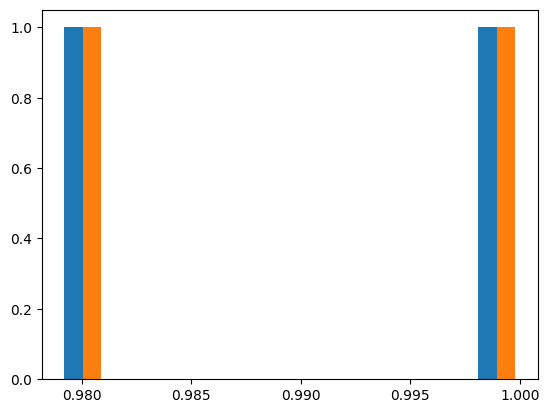

In [24]:
plt.hist(df.corr())

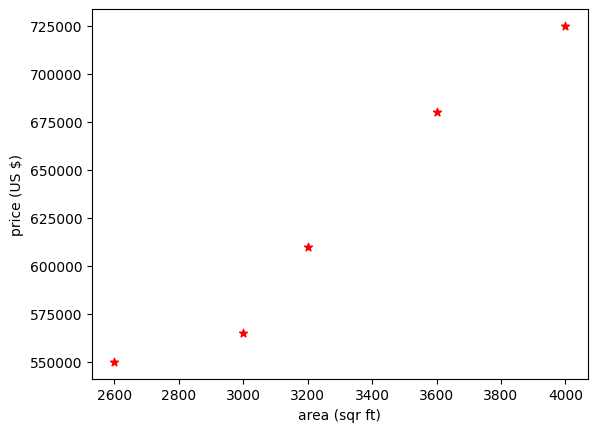

In [26]:
%matplotlib inline
plt.xlabel('area (sqr ft)')
plt.ylabel('price (US $)')
plt.scatter(df.area,df.price,color='red',marker="*")

In [27]:
new_df = df.drop('price',axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [28]:
#create the model
model = linear_model.LinearRegression()
model

LinearRegression()

In [29]:
model.fit(new_df,df.price)

LinearRegression()

In [30]:
model.predict([[5000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [33]:
model.coef_ # slop


array([135.78767123])

In [34]:
model.intercept_ # c value

180616.43835616432

In [35]:
# y = m * x + c
135.78767123 * 5000 + 180616.43835616432

859554.7945061643

In [36]:
area_df = pd.read_csv("/content/sample_data/predication_home_area.csv")
area_df

,area
0,5000
1,5500
2,6000
3,7200
4,7500
5,7800
6,8000


In [37]:
p=model.predict(area_df)
p

array([ 859554.79452055,  927448.63013699,  995342.46575342,
       1158287.67123288, 1199023.97260274, 1239760.2739726 ,
       1266917.80821918])

In [38]:
area_df["prices"] = p
area_df

,area,prices
0,5000,8.595548e+05
1,5500,9.274486e+05
2,6000,9.953425e+05
3,7200,1.158288e+06
4,7500,1.199024e+06
5,7800,1.239760e+06
6,8000,1.266918e+06


In [40]:
area_df.to_csv("/content/sample_data/predications.csv")
area_df

,area,prices
0,5000,8.595548e+05
1,5500,9.274486e+05
2,6000,9.953425e+05
3,7200,1.158288e+06
4,7500,1.199024e+06
5,7800,1.239760e+06
6,8000,1.266918e+06


In [42]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Example training data
X = np.array([[1], [2], [3], [4], [5]])  # Input features
y = np.array([2, 4, 6, 8, 10])  # Target variable

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Predict on new data
X_new = np.array([[22]])  # New input feature
y_pred = model.predict(X_new)

# Print the predicted output
print("Predicted Output:", y_pred)


Predicted Output: [44.]
